Logistic Regression


In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()


In [2]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


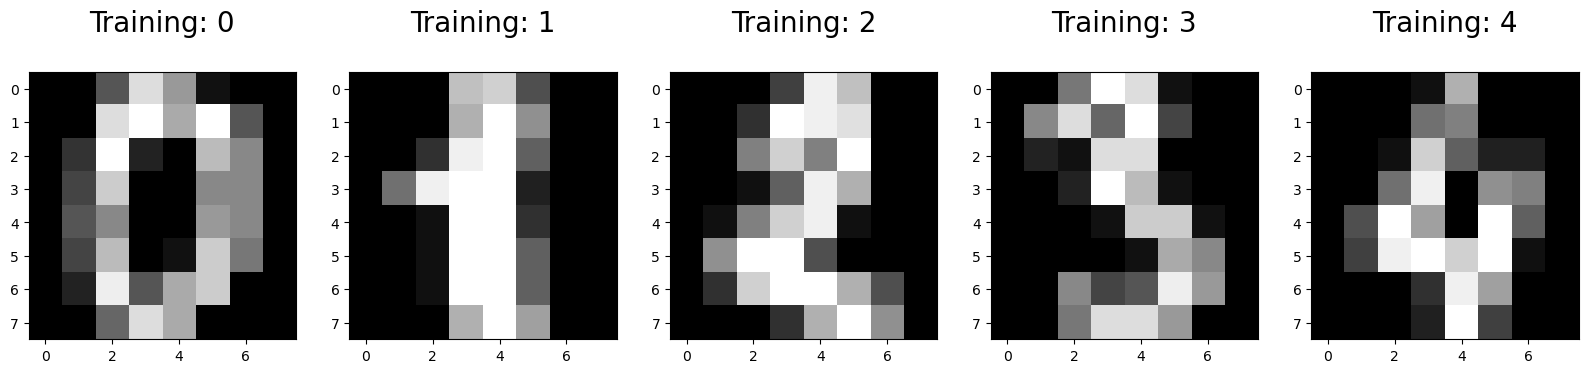

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2 )

In [5]:
print(x_test.shape)

(414, 64)


In [6]:
print(y_train.shape)

(1383,)


In [7]:
print(x_test.shape)

(414, 64)


In [8]:
print(y_test.shape)

(414,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logisticRegr = LogisticRegression(max_iter=1000, solver='liblinear')

logisticRegr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [34]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[1]


In [35]:
logisticRegr.predict(x_test[0:10])

array([1, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [36]:
predictions=logisticRegr.score(x_test, y_test)

In [37]:
score=logisticRegr.score(x_test, y_test)
print(score)

0.8792270531400966


In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

In [41]:
predictions = logisticRegr.predict(x_test_scaled)

cm= metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  1  0 38  0  1  0  2  0  0]
 [ 0  0  0  0 34  0  0  0  1  3]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  1  0 34  1]
 [ 0  0  0  1  0  1  0  1  2 29]]


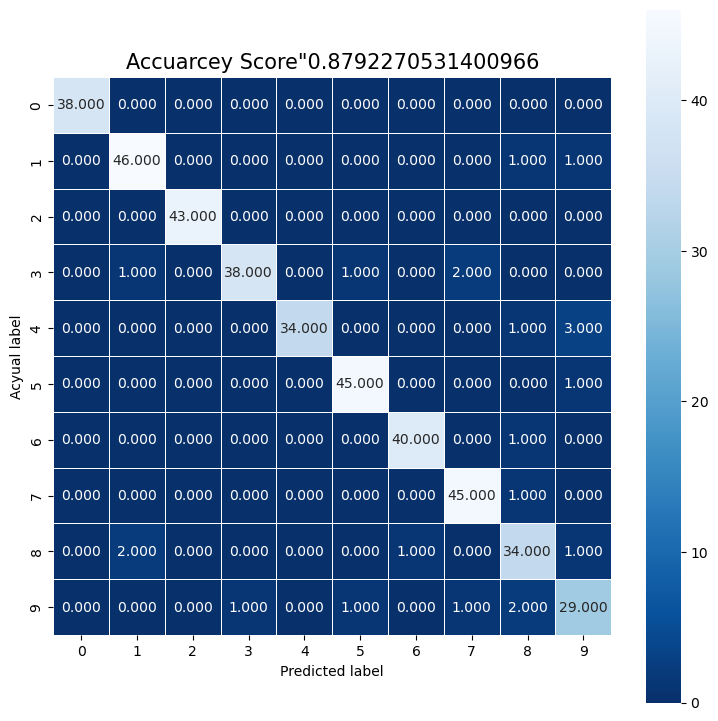

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r');
plt.ylabel("Acyual label");
plt.xlabel('Predicted label');
all_sample_title='Accuarcey Score"{0}'.format(score)
plt.title(all_sample_title, size=15);




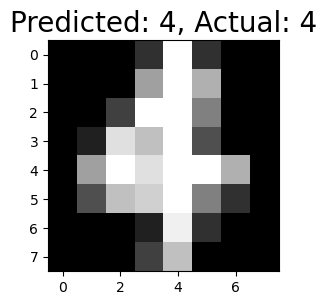

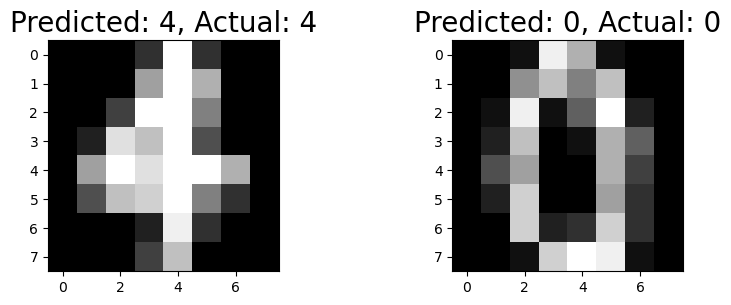

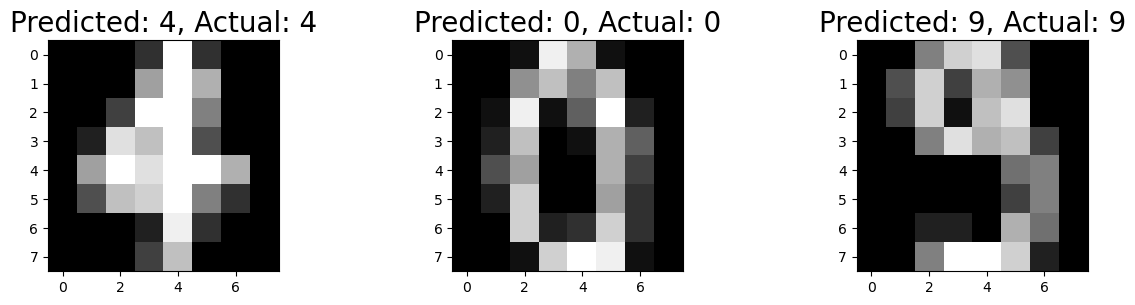

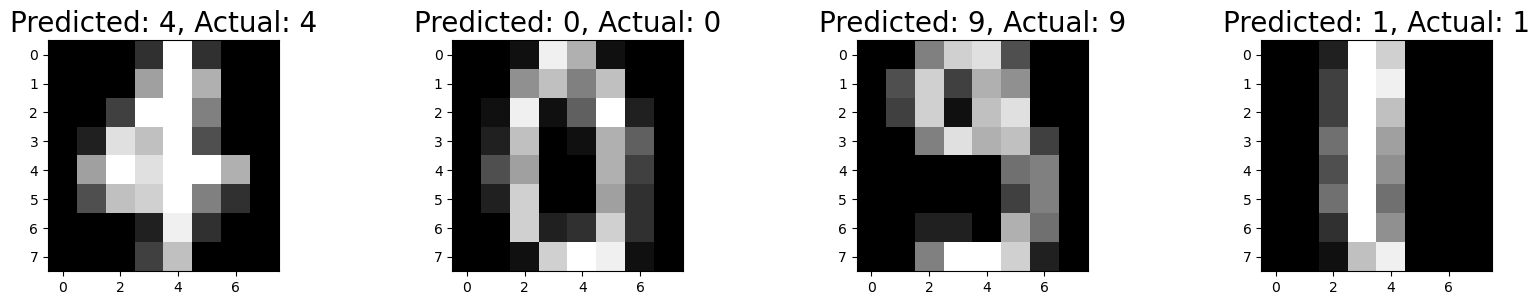

In [47]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
        index += 1
        if len(classifiedIndex) <= 4:
            plt.figure(figsize=(20, 3))
            for plotIndex, wrong in enumerate(classifiedIndex):
                plt.subplot(1, 4, plotIndex + 1)
                plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
                plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)
            plt.show()  # Display the current figure
            plt.close()  # Close the current figure to release memory

            